In [74]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import new_alg_v1 as na
import new_alg_v2 as na2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [75]:
output_dim = 10
# defining the network
class Net(nn.Module):
  def __init__(self, n):
    super().__init__()
    # an affine operation: y = Wx + b
    torch.manual_seed(13)
    self.fc1 = nn.Linear(n, 2*n, bias=False)
    self.fc1.weight.data.normal_(0, 1/np.sqrt(n))
    #torch.manual_seed(13)
    self.fc2 = nn.Linear(2*n, output_dim, bias=False)
    self.fc2.weight.data.normal_(0, 1/np.sqrt(n))

  def forward(self, x):
    x = self.fc1(x)
    z_hat = self.fc2(x)
    return z_hat

In [76]:
n = 1000
x_vec = torch.randn(n)
z = torch.ones(output_dim)
net = Net(n)

w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()


# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
lr = 0.01
optimizerSGD = optim.SGD(net.parameters(), lr)
optimizer = na.new_alg(net.parameters(), lr)

# training the net
steps = 500
losses = []
for i in range(steps):
    # zero the parameter gradients
    optimizerSGD.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    losses.append(float(loss))
    loss.backward()
    optimizer.step()

In [77]:
losses = np.array(losses)
steps_vec = np.arange(0,steps,1)
losses[steps - 1]


0.7398260831832886

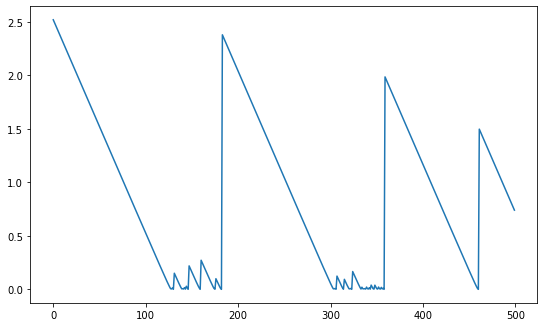

In [78]:
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(221)
ax1.plot(steps_vec, losses)

In [79]:
w1_final = net.fc1.weight.clone()
w2_final = net.fc2.weight.clone()

#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_init

z_hat = net(x_vec)
loss1 = loss_f(z_hat, z)


#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:] = w2_init

z_hat = net(x_vec)
loss2 = loss_f(z_hat, z)

print("loss1 = ", float(loss1))
print("loss2 = ", float(loss2))
print("inital loss = ", float(losses[0]))

loss1 =  0.4995393753051758
loss2 =  0.5323365926742554
inital loss =  2.5183334350585938


# v2

In [80]:
net = Net(n)

w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()
lr = 0.001


# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizerSGD = optim.SGD(net.parameters(), lr)
optimizer = na2.new_alg(net.parameters(), lr)

# training the net
steps = 20
losses = []
for i in range(steps):
    # zero the parameter gradients
    optimizerSGD.zero_grad()

    # forward + backward + optimize
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    losses.append(float(loss))
    loss.backward()
    optimizer.step()

In [81]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[ 0.0157,  0.0152,  0.0204,  ..., -0.0168,  0.0419,  0.0115],
           [ 0.0155, -0.0753, -0.0108,  ..., -0.0031,  0.0285,  0.0081],
           [-0.0377,  0.0150,  0.0499,  ..., -0.0163, -0.0289,  0.0525],
           ...,
           [-0.0247, -0.0375,  0.0009,  ...,  0.0003, -0.0921, -0.0163],
           [ 0.0214, -0.0182, -0.0275,  ...,  0.0119,  0.0368,  0.0212],
           [ 0.0194,  0.0157,  0.0167,  ..., -0.0274, -0.0011,  0.0299]],
          requires_grad=True),
   Parameter containing:
   tensor([[ 0.0641,  0.0166, -0.0446,  ...,  0.0117,  0.0080, -0.0426],
           [ 0.0136,  0.0025,  0.0190,  ..., -0.0016,  0.0043,  0.0490],
           [-0.0108, -0.0191,  0.0074,  ...,  0.0523,  0.0185, -0.0092],
           ...,
           [-0.0129, -0.0253, -0.0354,  ...,  0.0242, -0.0216,  0.0210],
           [-0.0433,  0.0082,  0.0143,  ..., -0.0162,  0.0449, -0.0373],
           [ 0.0391, -0.0012, -0.0021,  ..., -0.0387,  0.0540,  0.0225]],

In [82]:
losses = np.array(losses)
steps_vec = np.arange(0,steps,1)
losses[steps - 1]


8.81996364832105e-10

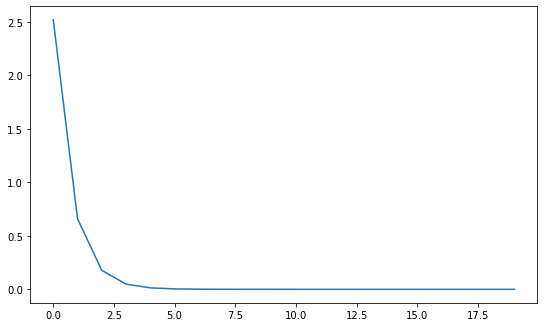

In [83]:
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(221)
ax1.plot(steps_vec, losses)

In [84]:
w1_final = net.fc1.weight.clone()
w2_final = net.fc2.weight.clone()

#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_init

z_hat = net(x_vec)
loss1 = loss_f(z_hat, z)


#init weights
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:] = w2_init

z_hat = net(x_vec)
loss2 = loss_f(z_hat, z)

print("loss1 = ", float(loss1))
print("loss2 = ", float(loss2))
print("inital loss = ", float(losses[0]))

loss1 =  0.628110408782959
loss2 =  0.6255617737770081
inital loss =  2.5183334350585938
